In [5]:
!pip install wbdata
import wbdata
import numpy as np
import cufflinks as cf
import pandas as pd
cf.go_offline()

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [4]:
!rm ~/.cache/wbdata/0.3.0

# Population Statistics: outputs a number of (male/female/people) when parameters, sex, age range and country is inputted.

In [6]:
def population (year, sex, age_range, place):
    age_indexes = []
    total_pop = 0
    
    for i in range (0, 80, 5):
        age_indexes.append(f'{i:02d}' + f'{i+4:02d}')
    age_indexes.append("80UP")

# set variable for appropriate sex
    male_variable = {"SP.POP."+ age_index+".MA":"Males "+ age_index for age_index in age_indexes}
    female_variable = {"SP.POP."+age_index+".FE":"Females "+age_index for age_index in age_indexes}
    
    if sex == 'Male':
        variable = male_variable
    else:      
        variable = female_variable
        if sex == 'Total':
            variable = female_variable
            variable.update(male_variable)
# select dataframe with selected variable and narrow it down into the correct country and year

    df = wbdata.get_dataframe(variable, country = place)
    df.index = df.index.astype(int)
    df.reset_index (inplace = True)
    df = df[df["date"] == year]
#for loop until the correct age_range:
    # to prevent size error in the case where the age_range is greater than provided data
    loop_count = int(age_range[1]/5)
    if sex == 'Total': 
        if age_range[1] > 85:
            loop_count = 34
        for i in range(1, loop_count + 1):
            total_pop += df.iloc[0][i]
    else:
        if age_range[1] > 85:
            loop_count = 17
        for i in range(1, loop_count+ 1):
            total_pop += df.iloc[0][i]
    return total_pop

population(year=2010,sex='Total',age_range=(0,100),place='WLD')

6969631911.0

# Population DataFrames: returns a pandas dataframe indexed by region/country and year with columns giving counts of people in different age-sex groups.

In [7]:
def population_by_sex_age (sex):
    age_indexes= []
    for i in range (0, 80, 5):
        age_indexes.append(f'{i:02d}' + f'{i+4:02d}')
    age_indexes.append("80UP")

#set variable for appropriate sex
    male_variable = {"SP.POP."+ age_index+".MA":"Males "+ age_index for age_index in age_indexes}
    female_variable = {"SP.POP."+age_index+".FE":"Females "+age_index for age_index in age_indexes}
    
    if sex == 'Male':
        variable = male_variable
    else:      
        variable = female_variable
        if sex == 'Total':
            variable = female_variable
            variable.update(male_variable)
#making country/region and year as index    
    df = wbdata.get_dataframe(variable)
    return df

population_by_sex_age(sex = 'Total')

Females 0004  Females 0509  Females 1014  \
country                     date                                             
Africa Eastern and Southern 2021    53234090.0    47750830.0    43088865.0   
                            2020    52265991.0    46911818.0    42069398.0   
                            2019    51296626.0    46072800.0    40999618.0   
                            2018    50354295.0    45238285.0    39886015.0   
                            2017    49459497.0    44365105.0    38773390.0   
...                                        ...           ...           ...   
Zimbabwe                    1964      415631.0      341230.0      291110.0   
                            1963      403496.0      331381.0      276213.0   
                            1962      391764.0      322013.0      256781.0   
                            1961      380468.0      313078.0      239351.0   
                            1960      369647.0      304571.0      223221.0   

                                  Females 1519  Females 2024  Females 2529  \
country                     date                                             
Africa Eastern and Southern 2021    37392619.0    32150758.0    28023647.0   
                            2020    36335804.0    31355868.0    27330572.0   
                            2019    35311876.0    30578412.0    26700947.0   
                            2018    34334491.0    29841888.0    26141601.0   
                            2017    33410378.0    29177045.0    25594212.0   
...                                        ...           ...           ...   
Zimbabwe                    1964      204435.0      172015.0      138356.0   
                            1963      196707.0      165838.0      134779.0   
                            1962      193933.0      159673.0      131872.0   
                            1961      189423.0      154060.0      129320.0   
                            1960      183903.0      149117.0      126929.0   

                                  Females 3034  Females 3539  Females 4044  \
country                     date                                             
Africa Eastern and Southern 2021    24474164.0    20373836.0    16114329.0   
                            2020    23844536.0    19607075.0    15395913.0   
                            2019    23161560.0    18847517.0    14730960.0   
                            2018    22432247.0    18101141.0    14153659.0   
                            2017    21674320.0    17350716.0    13678514.0   
...                                        ...           ...           ...   
Zimbabwe                    1964      119011.0      103374.0       85596.0   
                            1963      117351.0       99845.0       85673.0   
                            1962      115790.0       96033.0       86317.0   
                            1961      113886.0       92892.0       86400.0   
                            1960      111416.0       90906.0       85262.0   

                                  Females 4549  ...  Males 3539  Males 4044  \
country                     date                ...                           
Africa Eastern and Southern 2021    12840580.0  ...  19836395.0  15770587.0   
                            2020    12524773.0  ...  19161081.0  15076634.0   
                            2019    12243730.0  ...  18485600.0  14415738.0   
                            2018    11978368.0  ...  17803395.0  13828439.0   
                            2017    11705198.0  ...  17103010.0  13331062.0   
...                                        ...  ...         ...         ...   
Zimbabwe                    1964       78906.0  ...     96367.0     79754.0   
                            1963       75795.0  ...     93470.0     80309.0   
                            1962       71982.0  ...     90350.0     81382.0   
                            1961       68364.0  ...     87864.0     81913.0   
                            1960       65

# Population Pyramids: Function that takes input a DataFrame with columns providing counts of people by age-sex group and constructs a population pyramid graph for visualizing the data

In [8]:
import pandas as pd
import plotly.graph_objs as go

#creating sample dataframes to run the function
age_ranges = []
for i in range (0, 80, 5):
    age_ranges.append(f'{i:02d}' + f'{i+4:02d}')
age_ranges.append("80UP")
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
variables = male_variables
variables.update(female_variables)
df = wbdata.get_dataframe(variables,country="KOR")

def population_pyramids (dataframe, year):

    # first sort by age_range for y axis 
    age_ranges = []
    for i in range (0, 80, 5):
        age_ranges.append(f'{i:02d}' + f'{i+4:02d}')
    age_ranges.append("80UP")

    male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    variables = male_variables
    variables.update(female_variables)

    df = wbdata.get_dataframe(variables,country="WLD")
    #defined gender bins to contain only the columns of respective gender 
    men_bins = df.loc[str(year),:].filter(regex="Male").values
    women_bins = -df.loc[str(year),:].filter(regex="Female").values
    
    #make figure
    fig = go.Figure()

    #Add traces to the figure for men and women, respectively using the defined gender bins
    fig.add_trace(go.Bar(
                x = men_bins,
                y=[int(s[:2])+1 for s in age_ranges],
                name = 'Male', 
                orientation = 'h',
                marker = dict(color = 'blue'),
                hoverinfo = 'skip'))

    fig.add_trace(go.Bar(x = women_bins,
                        y=[int(s[:2])+1 for s in age_ranges],
                        orientation='h',
                        name='Women',
                        marker=dict(color='pink'),
                        hoverinfo='skip'
                       ))
    #cleaned up the figure to make it viewer-friendly
    fig.update_layout(
    template = 'plotly_white',
    title = 'Age Pyramid World ' + str(2021),
    title_font_size = 24,
    barmode = 'relative',
    bargap = 0.0,
    bargroupgap = 0
    )
                            
    return fig.show()
population_pyramids (df, 2021)

# Animated Popuolation Pyramid: takes as input as a dataframe with columns providing counts of people by age-sex groups, with rows corresponding to different years, and constructs an animated "population pyramid" graph for visualizing how the population changes over time.

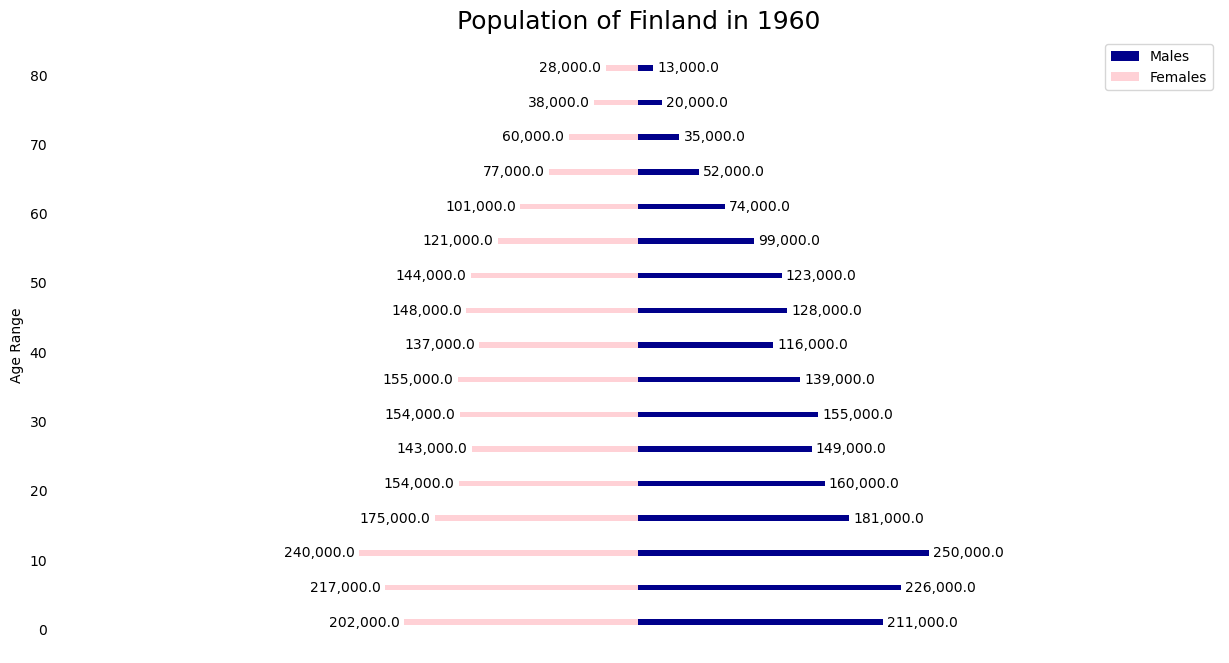

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

## creating sample dataframes to run the function
age_ranges = []
for i in range (0, 80, 5):
    age_ranges.append(f'{i:02d}' + f'{i+4:02d}')
age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
variables = male_variables
variables.update(female_variables)

df = wbdata.get_dataframe(variables,country="FIN")
df.index = df.index.astype(int)
df.reset_index (inplace = True)

def animated_population_pyramid (df):
    fig, ax = plt.subplots(figsize = (15,8))
    def animate(year):
        ax.clear()
        filtered_men = df[df['date'] == year].filter(regex="Male").values[0]
        filtered_women = -df[df['date'] == year].filter(regex="Female").values[0]
        age = [int(s[:2])+1 for s in age_ranges]
        male = plt.barh (y=age, width = filtered_men, color = '#00008B')
        female = plt.barh (y=age, width = filtered_women, color = '#FFD1D6')
        
        # pass in labels and set limits for scaled visualization
        ax.set_xlim(-500_000, 500_000)
        ax.bar_label(male, padding = 3, labels = [f'{round(values, -3):,}' for values in filtered_men])
        ax.bar_label(female, padding = 3, labels = [f'{-1* round(values, -3):,}' for values in filtered_women])
        #loop over the edge, move tick marks and clean up generally
        for edge in ['top', 'right', 'bottom', 'left']:
            ax.spines[edge].set_visible(False)
        ax.tick_params(left = False)
        ax.get_xaxis().set_visible(False)
        ax.set_ylabel("Age Range")
        ax.legend([male,female],['Males', 'Females'])
        ax.set_title(f'Population of Finland in {year}', size = 18)
        #animate using FuncAnimation imports by implemeting the animate function
    animation = FuncAnimation(fig, animate, frames = range(df['date'].min(),df['date'].max()+1))
    #implemeted HTML due to jupyter notebook limitation of visualizing gif file
    return HTML(animation.to_html5_video())
animated_population_pyramid (df)


## Project Description: comparative analysis of GDP vs. Average Years of Total Schooling in Finalnd and Colombia

### These graphs are interactive methods in order to compare GDP Per Capita or Total Years of Schooling between Columbia and Finland.

#### 1. We created an interactive plot that takes in a list of countries and compares their GDP per capita from 1960 to 2020.

In [10]:
#GDP per capital by country
GDP_indicators = {"NY.GDP.PCAP.CD": "GDP per capita"}
GDP_data = wbdata.get_dataframe(GDP_indicators, 
                                country = ['FIN', 'COL']).sort_values('date', ascending = True)
GDP_data = GDP_data.unstack('country')
GDP_data.head()
GDP_data.iplot(xTitle="Date",
               yTitle="GDP Per Capita",
               title="GDP Per Capita Per Country Over Time")

#### 2. This code chunk similarly compares average years of total schooling between Columbia and Finland. One country only took data points every 5 years so we dropped all other information for a uniform x-axis.

In [11]:
#Average years of schooling by country
pd.options.plotting.backend = 'plotly'
school_label = {"BAR.SCHL.1519" : "Average years of total schooling (Total)"}


school_enrollment = wbdata.get_dataframe(school_label, country = ['FIN', 'COL'])
school_enrollment = school_enrollment.unstack('country').dropna(how='all')
school_enrollment.iplot(xTitle="Date",
                        yTitle="Years of Schooling",
                        title="Total Years of Schooling Segmented by Gender")

#### 3. Since we observed the overall trend of GDP and average years of school for both countries, we now want to see the the correlation between them in each of the country.

In [12]:
#Finland and Colombia School_Enrollment
school_label = {"BAR.SCHL.1519" : "Average years of total schooling (Total)",
        "BAR.SCHL.1519.FE" : "Average years of total schooling (Female)"
        }

finland_school_enrollment = wbdata.get_dataframe(school_label, country = "FIN")
finland_school_enrollment.reset_index(inplace=True)
finland_school_enrollment = finland_school_enrollment.groupby("date").sum().replace(0,np.nan).dropna(how="any")

colombia_school_enrollment = wbdata.get_dataframe(school_label, country = "COL")
colombia_school_enrollment.reset_index(inplace=True)
colombia_school_enrollment = colombia_school_enrollment.groupby("date").sum().replace(0,np.nan).dropna(how="any")


In [13]:
#Finaland and Colombia GDP
GDP_indicators = {"NY.GDP.PCAP.CD": "GDP per capita"}

finland_GDP_data = wbdata.get_dataframe(GDP_indicators, country = "FIN")
finland_GDP_data.reset_index(inplace=True)

colombia_GDP_data = wbdata.get_dataframe(GDP_indicators, country = "COL")
colombia_GDP_data.reset_index(inplace=True)

In [14]:
#combined dataframe of school enrollment and GDP for respective country
fin_education_GDP= finland_school_enrollment.join(finland_GDP_data.set_index('date'), on='date')
col_education_GDP= colombia_school_enrollment.join(colombia_GDP_data.set_index('date'), on='date')

Text(0, 0.5, 'Average years of Schooling (Total)')

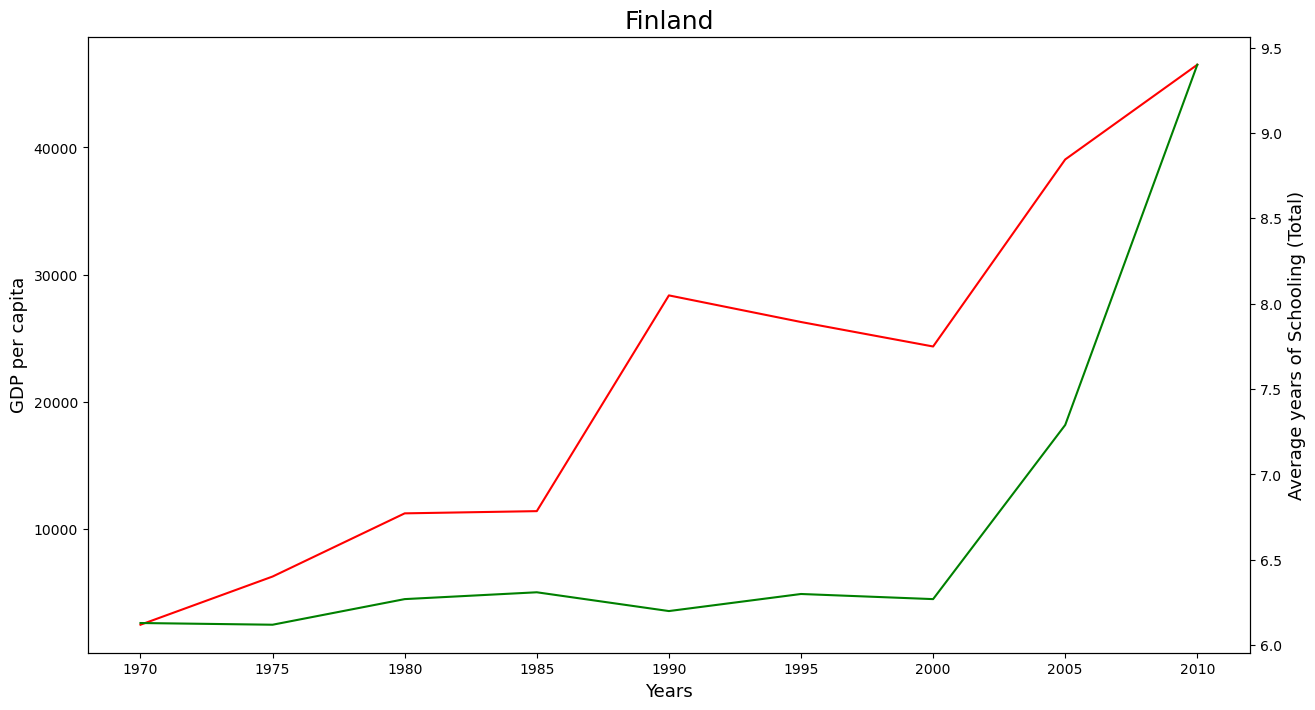

In [15]:
#Finland correlation between GDP and Average years of Schooling (Total)
import matplotlib.pyplot as plt
fig,finGDP = plt.subplots(figsize = (15,8))
finGDP.set_xlabel('Years', fontsize = 13)
finGDP.plot(fin_education_GDP["GDP per capita"], color = 'red')
finGDP.set_ylabel('GDP per capita', fontsize = 13)
finschool = finGDP.twinx()
finschool.plot(fin_education_GDP["Average years of total schooling (Total)"], color = 'green')
finschool.set_title("Finland", fontsize = 18)
finschool.set_ylabel('Average years of Schooling (Total)', fontsize = 13)


Text(0, 0.5, 'Average years of schooling (Total)')

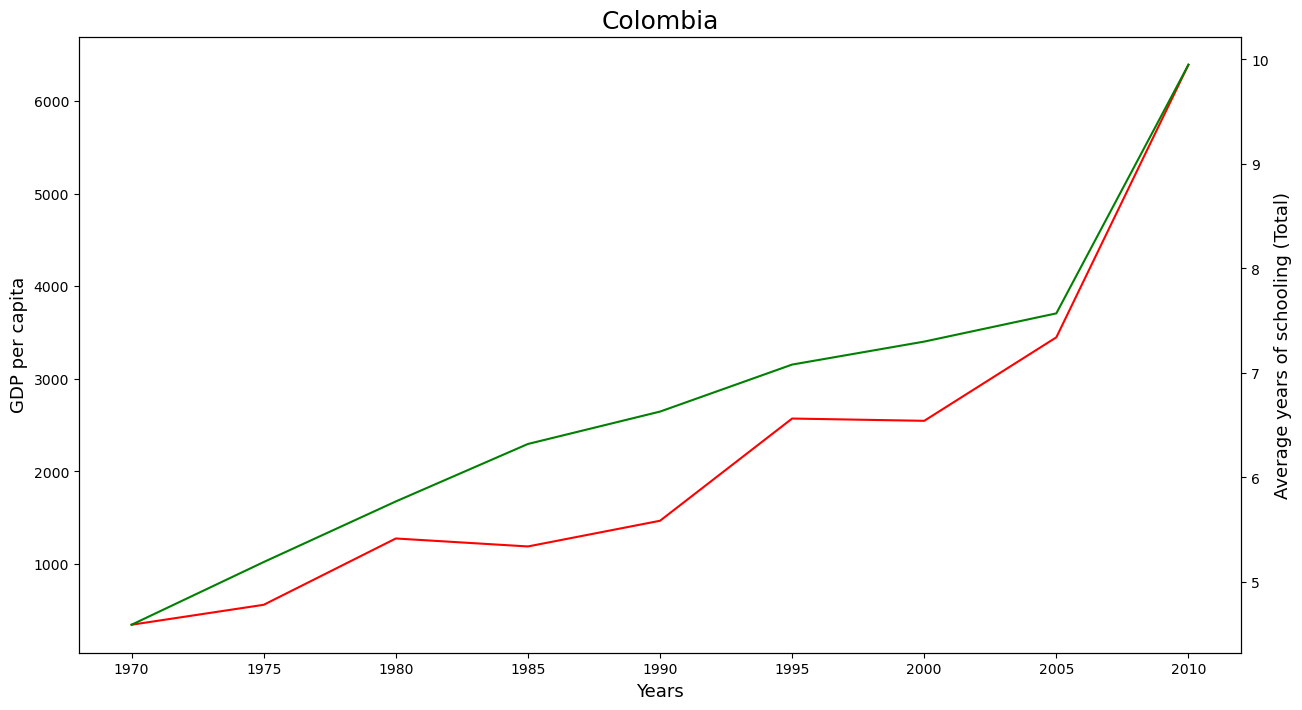

In [16]:
#Colombia correlation between GDP and Average years of Schooling (Total)
import matplotlib.pyplot as plt
fig,colGDP = plt.subplots(figsize = (15,8))
colGDP.plot(col_education_GDP["GDP per capita"], color = 'red')
colGDP.set_ylabel('GDP per capita', fontsize = 13)
colGDP.set_xlabel('Years', fontsize = 13)
col_school = colGDP.twinx()
col_school.plot(col_education_GDP["Average years of total schooling (Total)"], color = 'green')
col_school.set_title("Colombia", fontsize = 18)
col_school.set_ylabel("Average years of schooling (Total)", fontsize = 13)

Text(0, 0.5, 'Average years of schooling (Total)')

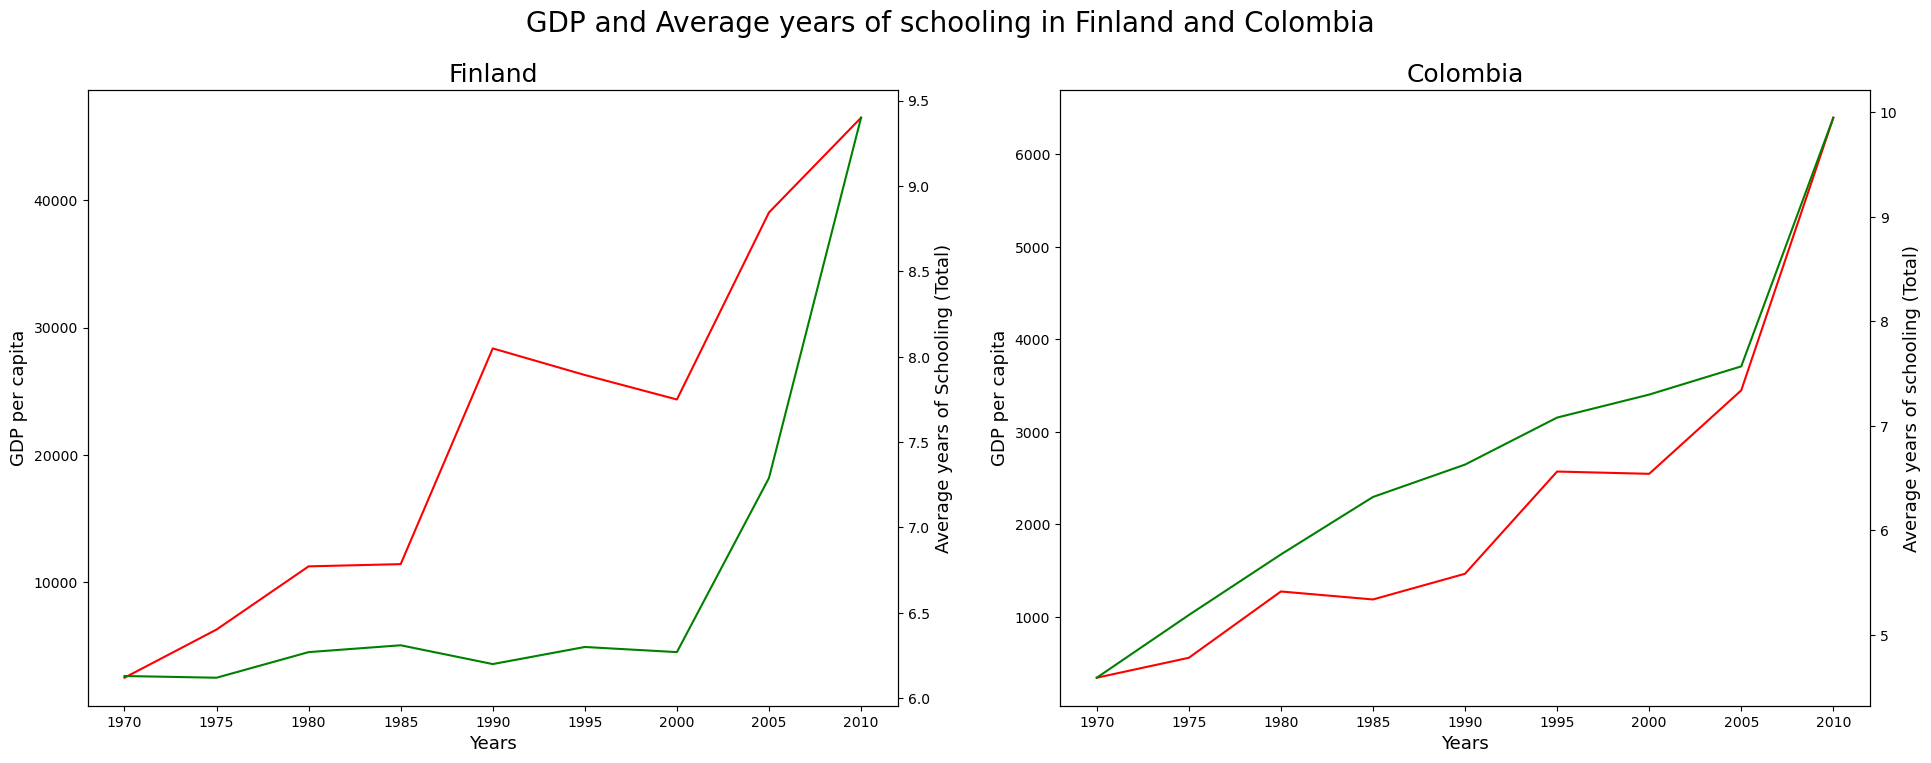

In [17]:
#Comparative analysis between Finland and Colombia's correlation between GDP and Average years of Schooling (Total)
import matplotlib.pyplot as plt
fig,(finGDP,colGDP) = plt.subplots(1,2, figsize = (23,8))
fig.suptitle('GDP and Average years of schooling in Finland and Colombia', fontsize = 20)
finGDP.set_xlabel('Years', fontsize = 13)
finGDP.plot(fin_education_GDP["GDP per capita"], color = 'red')
finGDP.set_ylabel('GDP per capita', fontsize = 13)
finschool = finGDP.twinx()
finschool.plot(fin_education_GDP["Average years of total schooling (Total)"], color = 'green')
finschool.set_title("Finland", fontsize = 18)
finschool.set_ylabel('Average years of Schooling (Total)', fontsize = 13)

colGDP.plot(col_education_GDP["GDP per capita"], color = 'red')
colGDP.set_ylabel('GDP per capita', fontsize = 13)
colGDP.set_xlabel('Years', fontsize = 13)
col_school = colGDP.twinx()
col_school.plot(col_education_GDP["Average years of total schooling (Total)"], color = 'green')
col_school.set_title("Colombia", fontsize = 18)
col_school.set_ylabel("Average years of schooling (Total)", fontsize = 13)